Run: python obiwan/priors.py --outdir junk

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from astropy.io import fits
from astrometry.util.fits import fits_table, merge_tables
import os
import sys
from glob import glob
from scipy.optimize import newton
from sklearn.neighbors import KernelDensity
import pickle

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from theValidator.catalogues import CatalogueFuncs,Matcher

In [42]:
# Import like this so will ALWAYS be reloaded
%aimport obiwan.priors
print(obiwan.priors.__file__)

In [47]:
kwargs= dict(savekde=True, loadkde= False, 
             savefig= True,
             alpha= 0.25, DR=2, outdir='.',nb=True)

('self.fracflux=', False, 'kwargs= ', {'loadkde': False, 'savefig': True, 'nb': True, 'savekde': True, 'rlimit': 24.4, 'alpha': 0.25, 'DR': 3, 'outdir': '.'})
('ELGs, self.rlimit= ', 24.4)


/global/cscratch1/sd/kaylanb/test/obiwan/py/obiwan/priors.py:709: RuntimeWarning: invalid value encountered in less
  def std_star_cut(self,data):


dr3_deep2 21820
dr3_deep2, after obiwan cut 11479
dr3_deep2, after cut bad vals 9321
Wrote ./tractor_ELG_dr3deep2_expdev_tractor_re.png
Wrote ./tractor_ELG_dr3deep2_expdev_tractor_n.png
size 9321 2523
Wrote ./plot_2d_ELG_dr3deep2_tractor_re_zhelio.png
Wrote ./plot_2d_ELG_dr3deep2_tractor_re_g_wdust.png
Wrote ./plot_2d_ELG_dr3deep2_tractor_re_r_wdust.png
Wrote ./plot_2d_ELG_dr3deep2_tractor_re_z_wdust.png
Wrote ./plot_2d_ELG_dr3deep2_zhelio_g_wdust.png
Wrote ./plot_2d_ELG_dr3deep2_zhelio_r_wdust.png
Wrote ./plot_2d_ELG_dr3deep2_zhelio_z_wdust.png
fit kde
Wrote ./kde_2d_ELG_dr3deep2_rz_gr.png
Wrote ./kde_2d_ELG_dr3deep2_tractor_re_gr.png
Wrote ./kde_2d_ELG_dr3deep2_tractor_re_r_wdust.png
Wrote ./kde_2d_ELG_dr3deep2_tractor_re_rz.png
Wrote ./kde_2d_ELG_dr3deep2_zhelio_tractor_re.png
Wrote ./kde_2d_ELG_dr3deep2_zhelio_gr.png
Wrote ./kde_2d_ELG_dr3deep2_zhelio_r_wdust.png
Wrote ./kde_2d_ELG_dr3deep2_zhelio_rz.png
Wrote ./kde_in_FDR_Data_dr3deep2_ELG.png
Wrote ./kde_in_FDR_KDE_dr3deep2_ELG.p

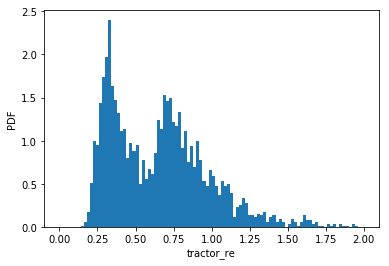

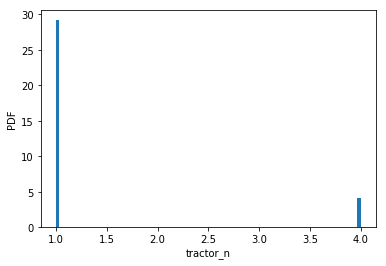

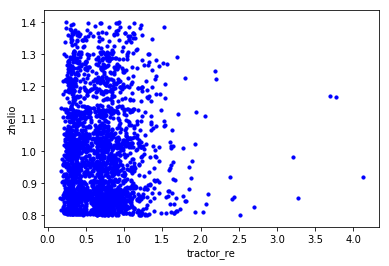

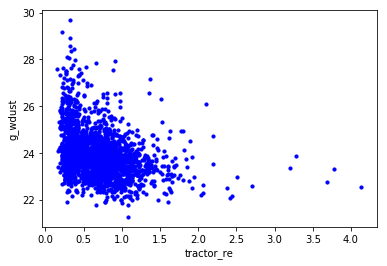

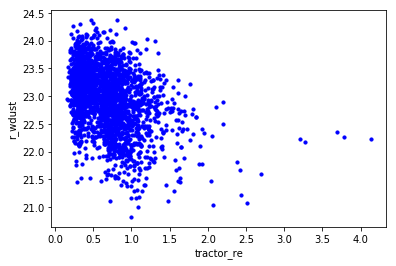

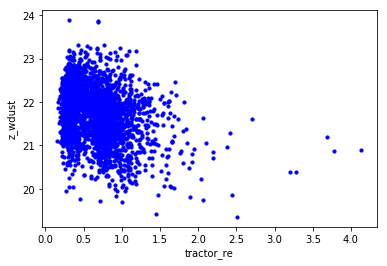

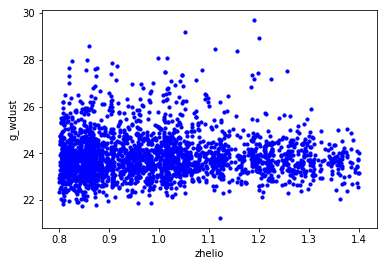

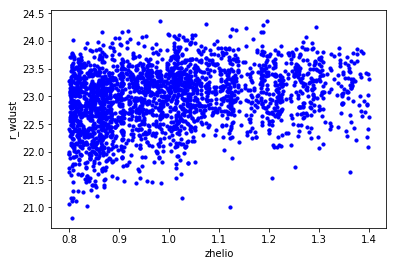

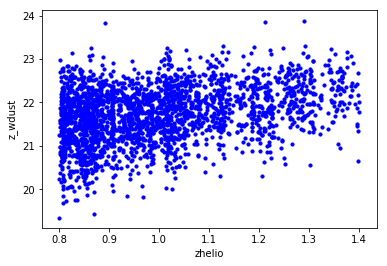

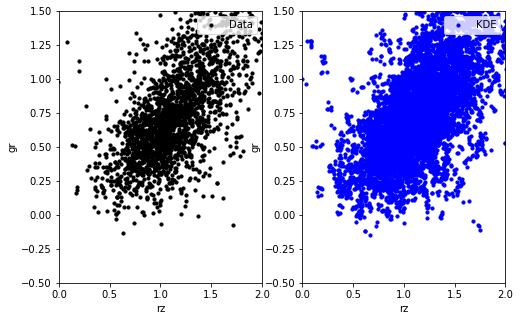

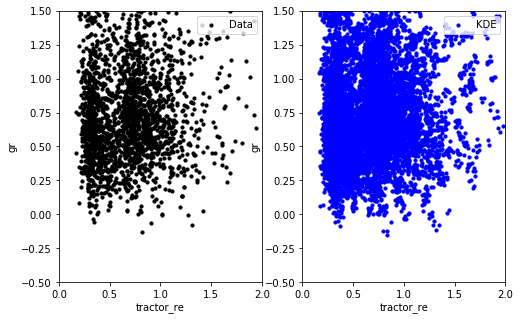

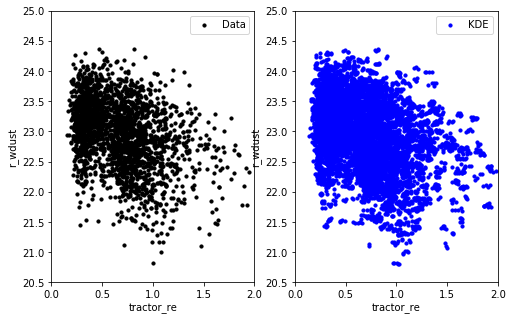

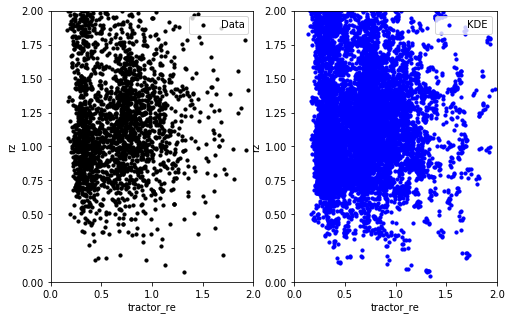

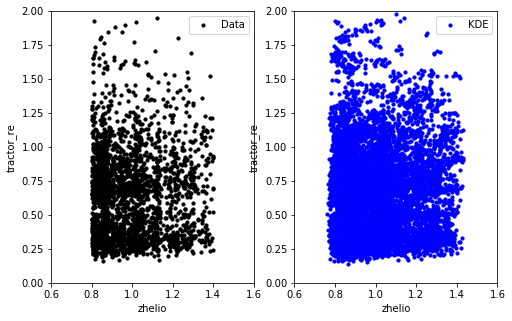

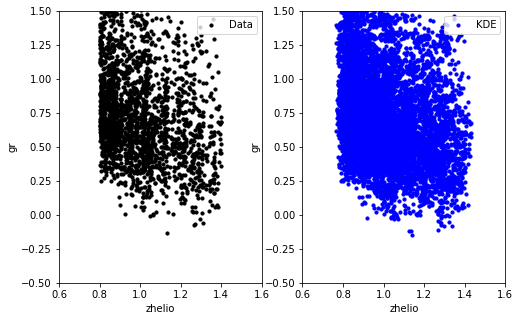

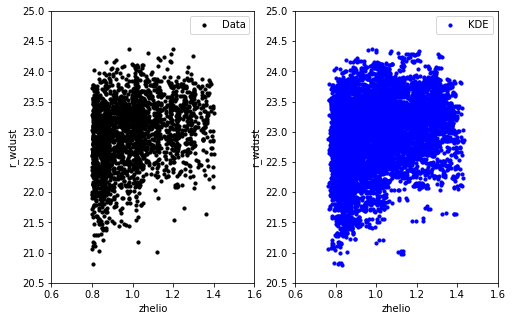

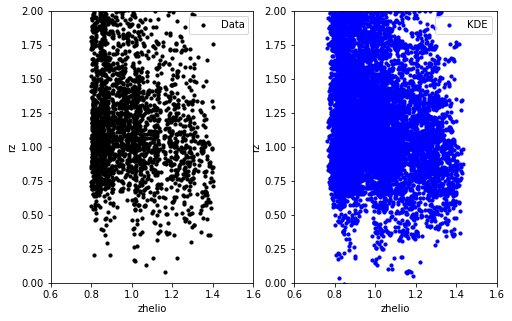

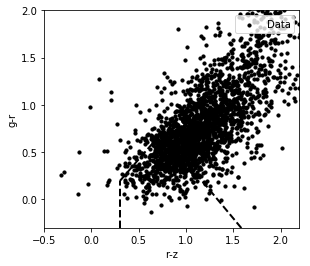

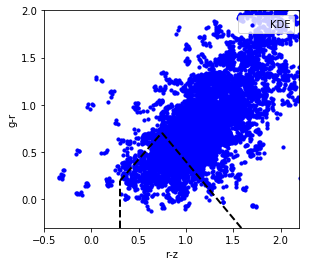

In [49]:
kwargs.update(DR=3, rlimit=23.4+1.)
elg= obiwan.priors.ELG(**kwargs)
elg.fit_kde(use_acs=False)

('self.fracflux=', False, 'kwargs= ', {'loadkde': False, 'savefig': True, 'zlimit': 21.46, 'nb': True, 'savekde': True, 'rlimit': 24.4, 'alpha': 0.25, 'DR': 3, 'outdir': '.'})
('LRGs, self.zlimit= ', 21.46)
dr3_cosmos 28675
dr3_cosmos after obiwan cuts: 3973
dr3_cosmos after finite cuts: 3897
dr3_cosmos after redshift > 0.050000: 3762
Wrote ./tractor_LRG_dr3cosmos_expdev_tractor_re.png
Wrote ./tractor_LRG_dr3cosmos_expdev_tractor_n.png
size 3762 1251
Wrote ./plot_2d_LRG_tractor_re_zp_gal.png
Wrote ./plot_2d_LRG_tractor_re_g_wdust.png
Wrote ./plot_2d_LRG_tractor_re_r_wdust.png
Wrote ./plot_2d_LRG_tractor_re_z_wdust.png
fit kde
Wrote ./kde_2d_lrg_dr3cosmosacs_rz_rw1.png
Wrote ./kde_2d_lrg_dr3cosmosacs_zp_gal_tractor_re.png
Wrote ./kde_2d_lrg_dr3cosmosacs_zp_gal_g_wdust.png
Wrote ./kde_2d_lrg_dr3cosmosacs_zp_gal_rz.png
Wrote ./kde_2d_lrg_dr3cosmosacs_zp_gal_z_wdust.png
Wrote ./kde_2d_lrg_dr3cosmosacs_zp_gal_rw1.png
Wrote ./kde_2d_lrg_dr3cosmosacs_tractor_re_g_wdust.png
Wrote ./kde_2d_lrg_

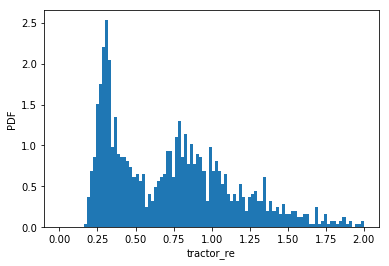

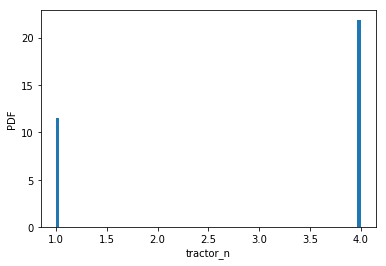

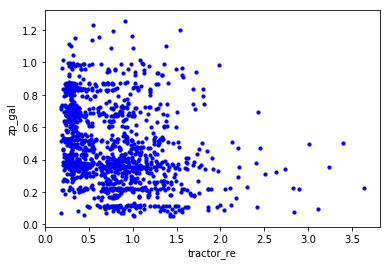

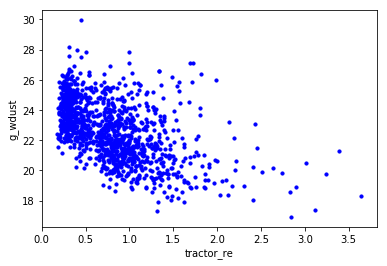

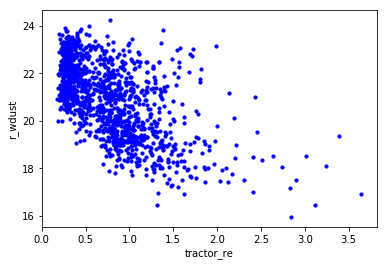

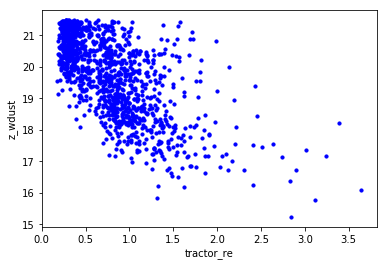

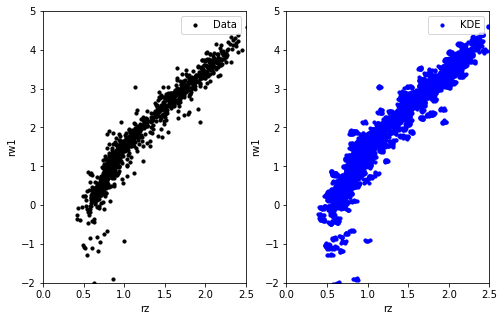

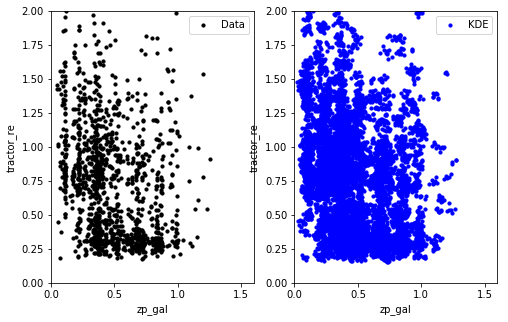

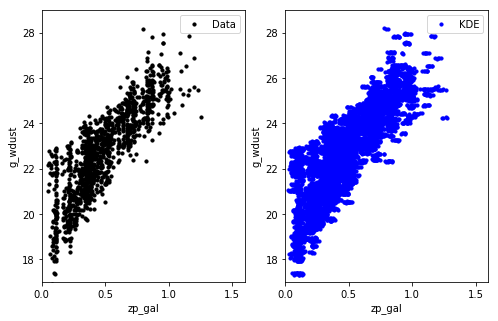

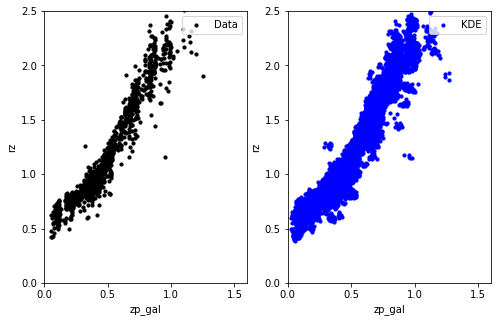

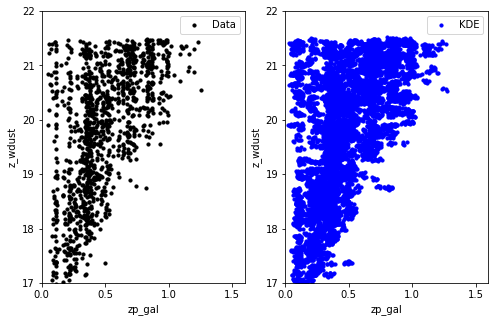

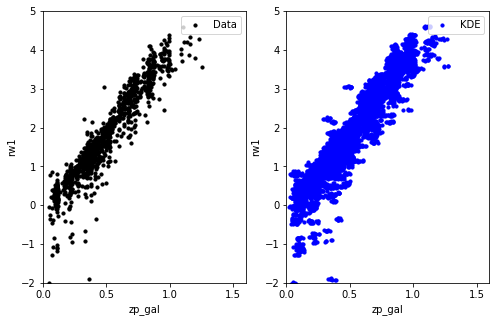

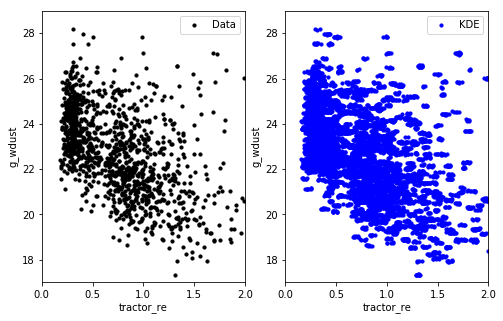

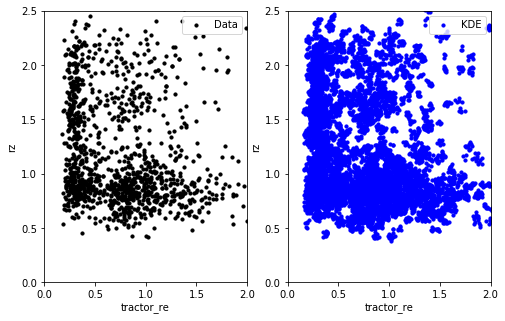

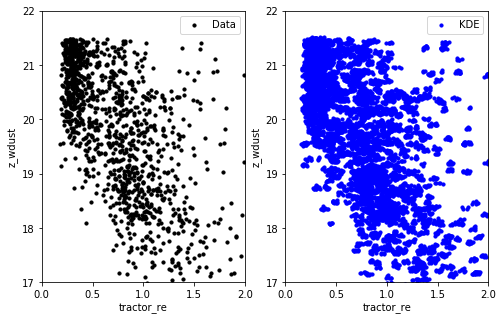

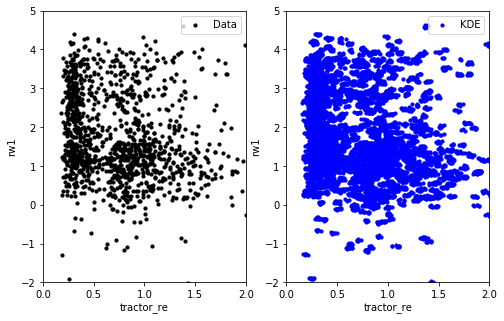

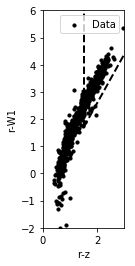

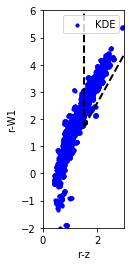

In [51]:
kwargs.update(dict(zlimit=20.46+1.))
lrg= obiwan.priors.LRG(**kwargs)
lrg.fit_kde(use_acs=False)